<a href="https://colab.research.google.com/github/melvinps/Schindler-Data-Analysis/blob/main/Callback_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **IMPORT DATA**

Select Route by entering respectively location (eg. D01, e02)

---

Select Month by entering month number (eg. **4** for april, **5** for may)

In [445]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from collections import defaultdict

%load_ext google.colab.data_table
%matplotlib inline

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [435]:
df = pd.read_excel('2021 04 28 Daily Callbacks.xlsx')

In [436]:
df = df[['Location','Notification date','Name','Description of technical object','Description','Long Text Description']].dropna()

In [437]:
df['Notification date'] = pd.to_datetime(df['Notification date'])

**Skip if do not want to filter by routes or date**

In [403]:
route = input('Enter Route: ')
route = '808' + route.upper()
print('Route: ' + route)

Enter Route: d01
Route: 808D01


In [404]:
m = input('Enter the month of notification date: ')
print('Month selected: ' + m)

Enter the month of notification date: 4
Month selected: 4


In [438]:
df_route_sick = df.loc[(df['Location'] == route) & (df['Notification date'].dt.month == int(m))]
df_route = df.loc[(df['Location'] == route)]
df_route_date = df_route.loc[df_route['Notification date'].dt.month == int(m)]

### **SICK UNIT**

In [ ]:
if route == '808':
  df_sick = df
else:
  df_sick = df_route_sick


df_sick.groupby(['Location','Name','Description of technical object']).count()
df_sick['No. of Callbacks'] = df_sick.groupby(['Location','Name','Description of technical object'])['Notification date'].transform('count')
df_sick = df_sick[df_sick['No. of Callbacks']>=3] 
df_sick_No_des = df_sick.drop(['Notification date','Description','Long Text Description'], axis=1)
df_sick_No_des.groupby(['Location','Name','Description of technical object'],as_index = 'Location').count()



# pd.set_option("display.max_rows", None, "display.max_columns", None)
# print()


**Show Error Description**

In [ ]:
df_sick_with_des = df_sick.drop(['Notification date','Description'], axis=1)
df_sick_with_des.groupby(['Location','Name','Description of technical object','Long Text Description'],as_index = 'Location').count()#.sort_values(by=['No. of Callbacks'],ascending=False)

### **Visualization**

In [ ]:
df_v = df_route 
df_v['Month'] = df['Notification date'].dt.month
df_v = df_v.drop(['Notification date', 'Long Text Description','Location'], axis=1)
df_v.groupby(['Name','Description of technical object','Month']).count()

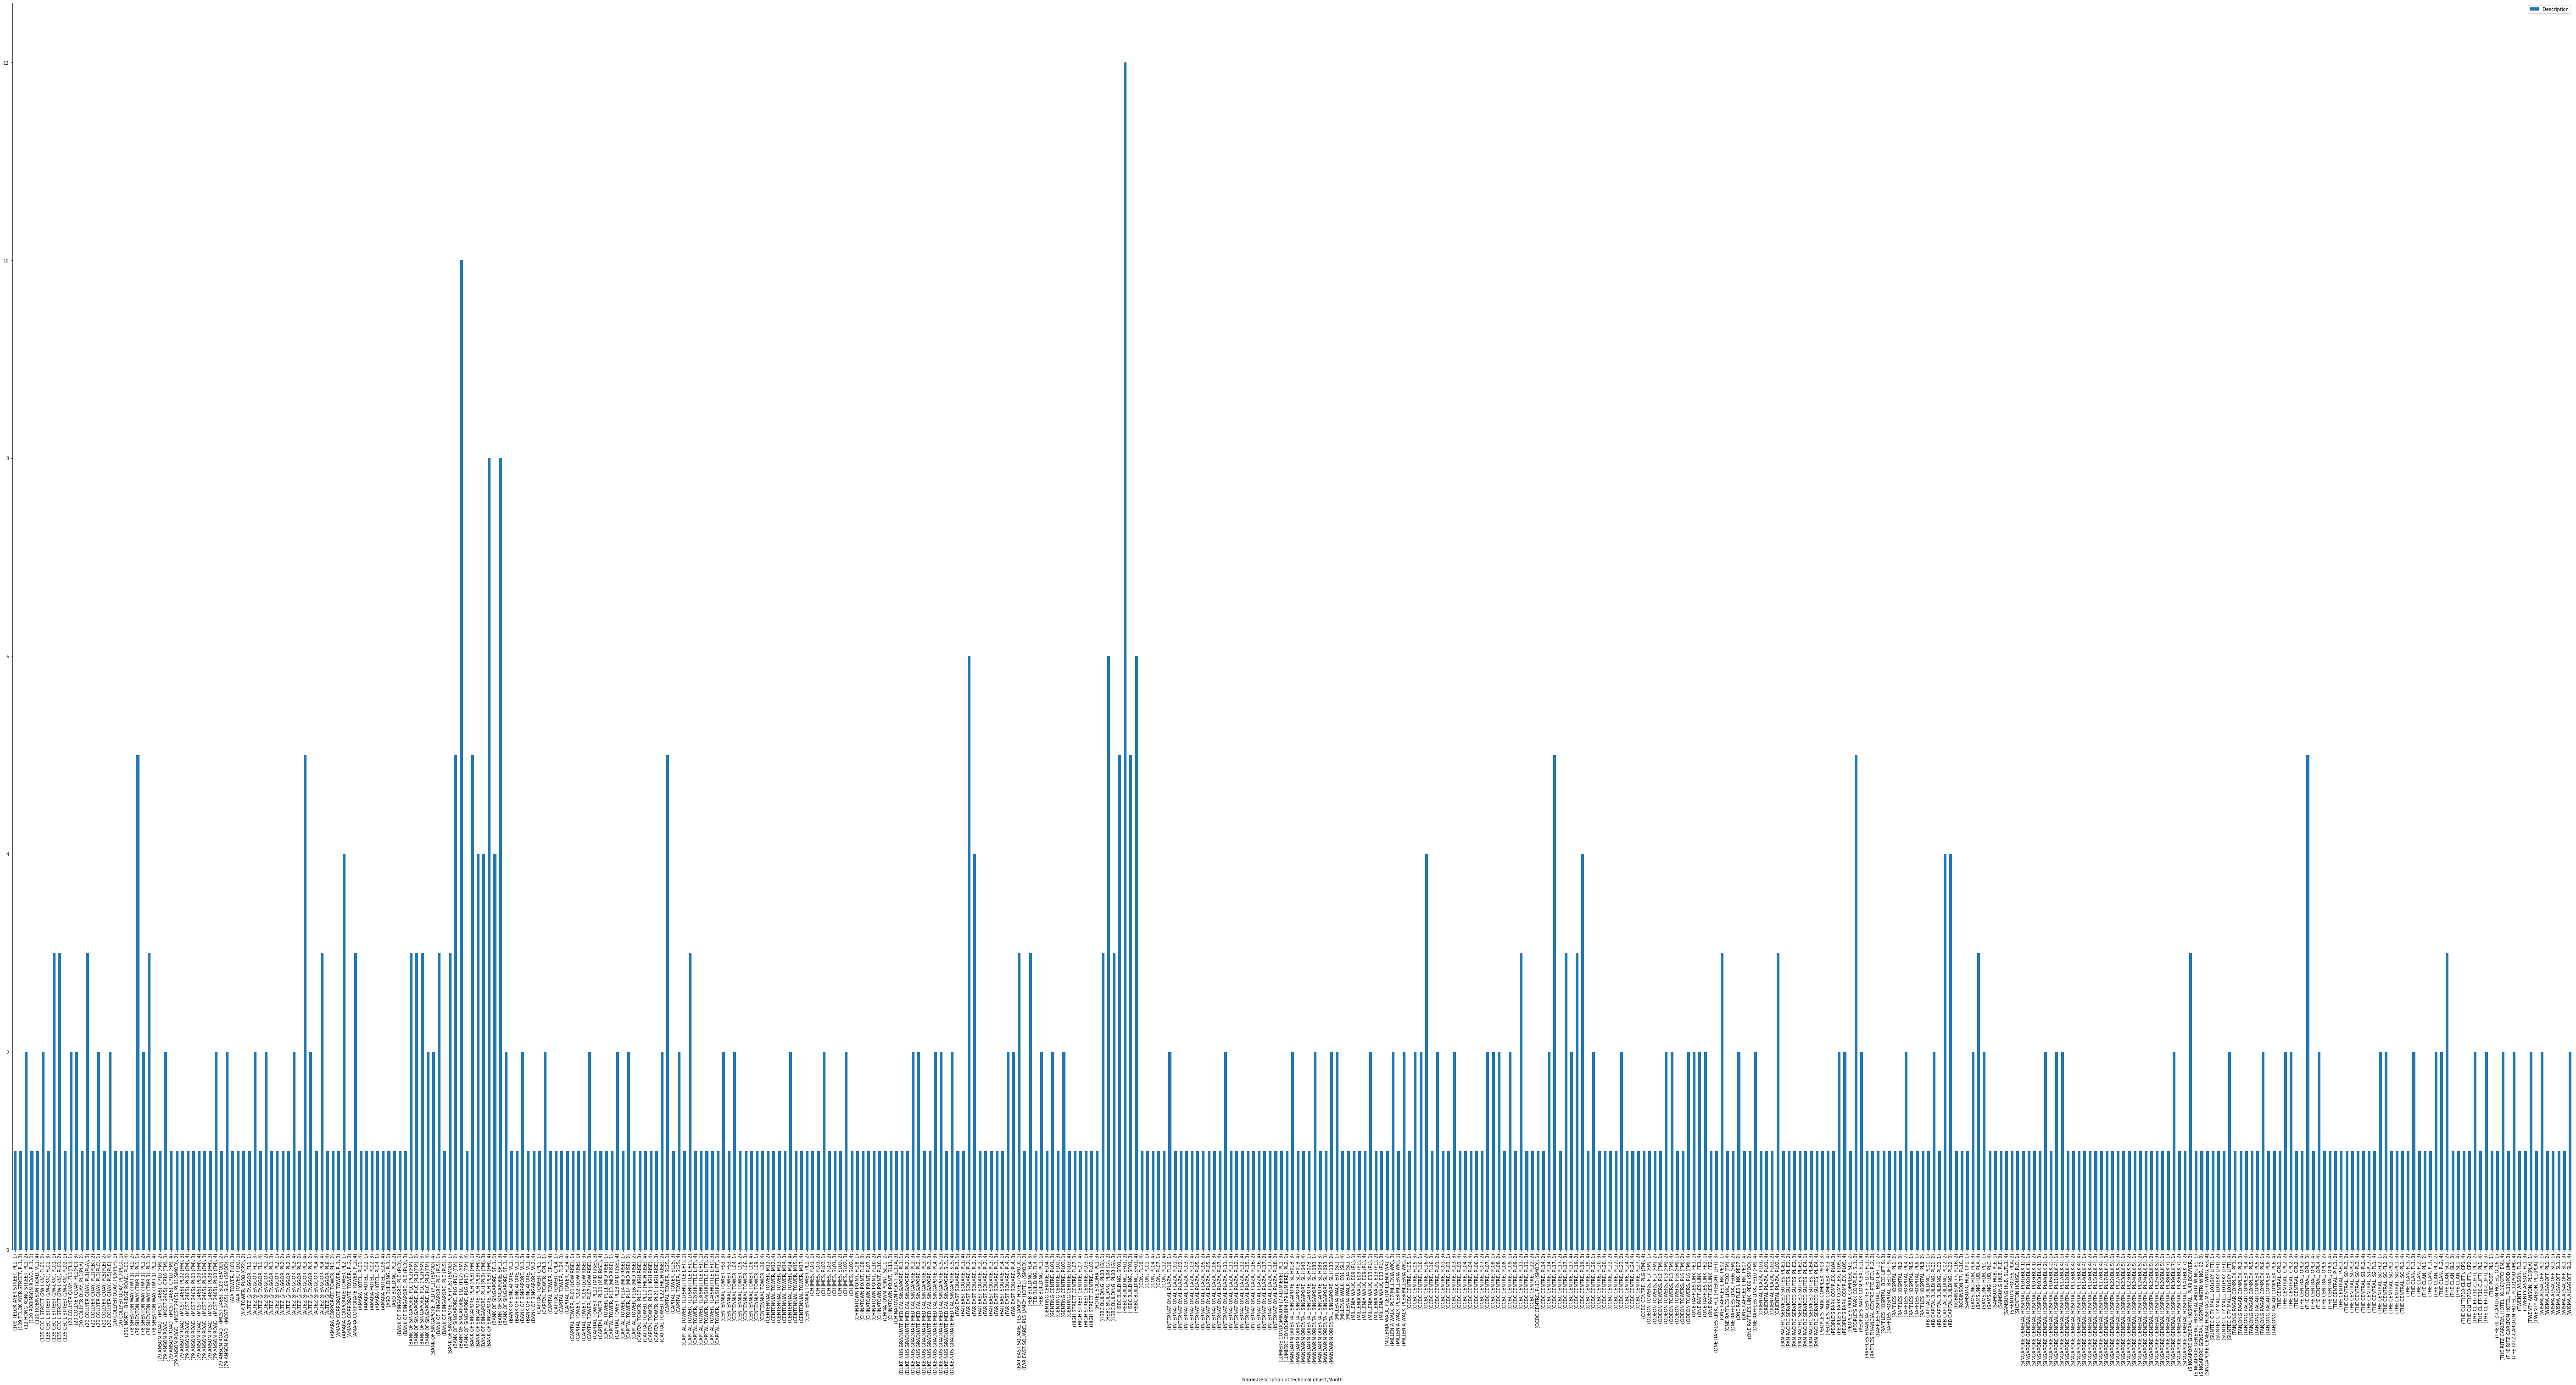

In [444]:
df_v.groupby(['Name','Description of technical object','Month']).count().plot(kind='bar',figsize=(100, 50) )


In [ ]:
# df_route_date = df_route.loc[df_route['Notification date'].dt.month == int(m)]
# df_route_date = df_route_date.sort_values(by='Notification date')
# temp = df_route_date.drop(['Location', 'Notification date','Long Text Description'], axis=1)
# temp.groupby(['Name','Description of technical object']).count()


In [ ]:
temp.groupby(['Name','Description of technical object']).count().plot(kind='bar',figsize=(20, 10))
# plt.xticks(rotation=30, horizontalalignment="center")
